# Project- Valuation and Hedging - Bonds & Yields 

## 1. Definition and explication of the issuance of a bond 

A bond is a fixed income security that represents a loan.  

There are different types of issuer (companies, states, governments...). They issue bonds to borrow money in order to finance different projects.  

In return to lending their money by buying the bonds, the bondholders receive interest as a percentage of what they lent.  
The interest rate that is received by the investors, the coupon, is fixed and received periodically. Except specific bonds like zero coupon bonds, the bonds purchased by the investor give them the security of stable interest payments.  

The bonds are issued at par value, which is the their face value or the amount lent for one bond to a issuer.  
Generally speaking, the par value of a bond is 100, 1000 or $10000.

After being released on the market, a bond's value flucutuates in response to economic conditions, such as changes in interest rates. There are 2 possible scenarios=  

A) A bond traded below its par value is traded at a discount.  
In this scenario investors will prefer to purchase the newly issued bonds since they provide higher yield at the same price. Because of that, the price of the original bond decrease to stay attractive in the market.  
Hence, when interest rates increase, the bond prices decrease. 

B) A bond tradeed above its par value is traded at a discount.  
If the interest rates decrease below the bond's rate, the bond's higher coupons become more attractive compared to the new bonds issued at a lower rate.  
Therefore the bond can command a higher sale price because the ither investors will agree to pay more for having higher coupons.  
Thus, when interest rates decrease, the bond price rise. 


## 2. Choose 10 consecutive semi annual spot yields

For this analysis we select 1th of April 2010 as the date.  
We choose from the spot yield curve 10 consecutive semi-annual spot yields.  
The yields are those of  zero-coupon bonds, with a par value of 100€.  
The 10 consecutive semi-annual yields represent a period of 5 years, up to 2015.  
It is important for the analysis to make a recall about the principle of spot rate: 

## 3.Spot rate and characteristics 

To understand the principle of spot rate, we have to define what is a yield curve, which is a curve that represents the relationship between interest rates and different maturities.  
There are several yield curve, one of them is the spot yield curve:  

The spot yield curve is a curve that represents the relationship between spot interest rates and different maturities.  
The spot rate is the interest rate at which a person can borrow money today. The spot rate has several features: 

It is also called the zero-coupon rate because the spot rate is the yield on a zero-coupon bond, a bond thay pays no coupons.  
The spot rate discounts a single cash flow to today.  


The spot rates are derived from the market through a method called "Bootstrapping":  
It refers to a technnique though which the the spot rates are derives from the prices of coupon-bearing product or from zero-coupon bonds.  
To derive spot rates from zero couponns bonds, the following method is applied: 




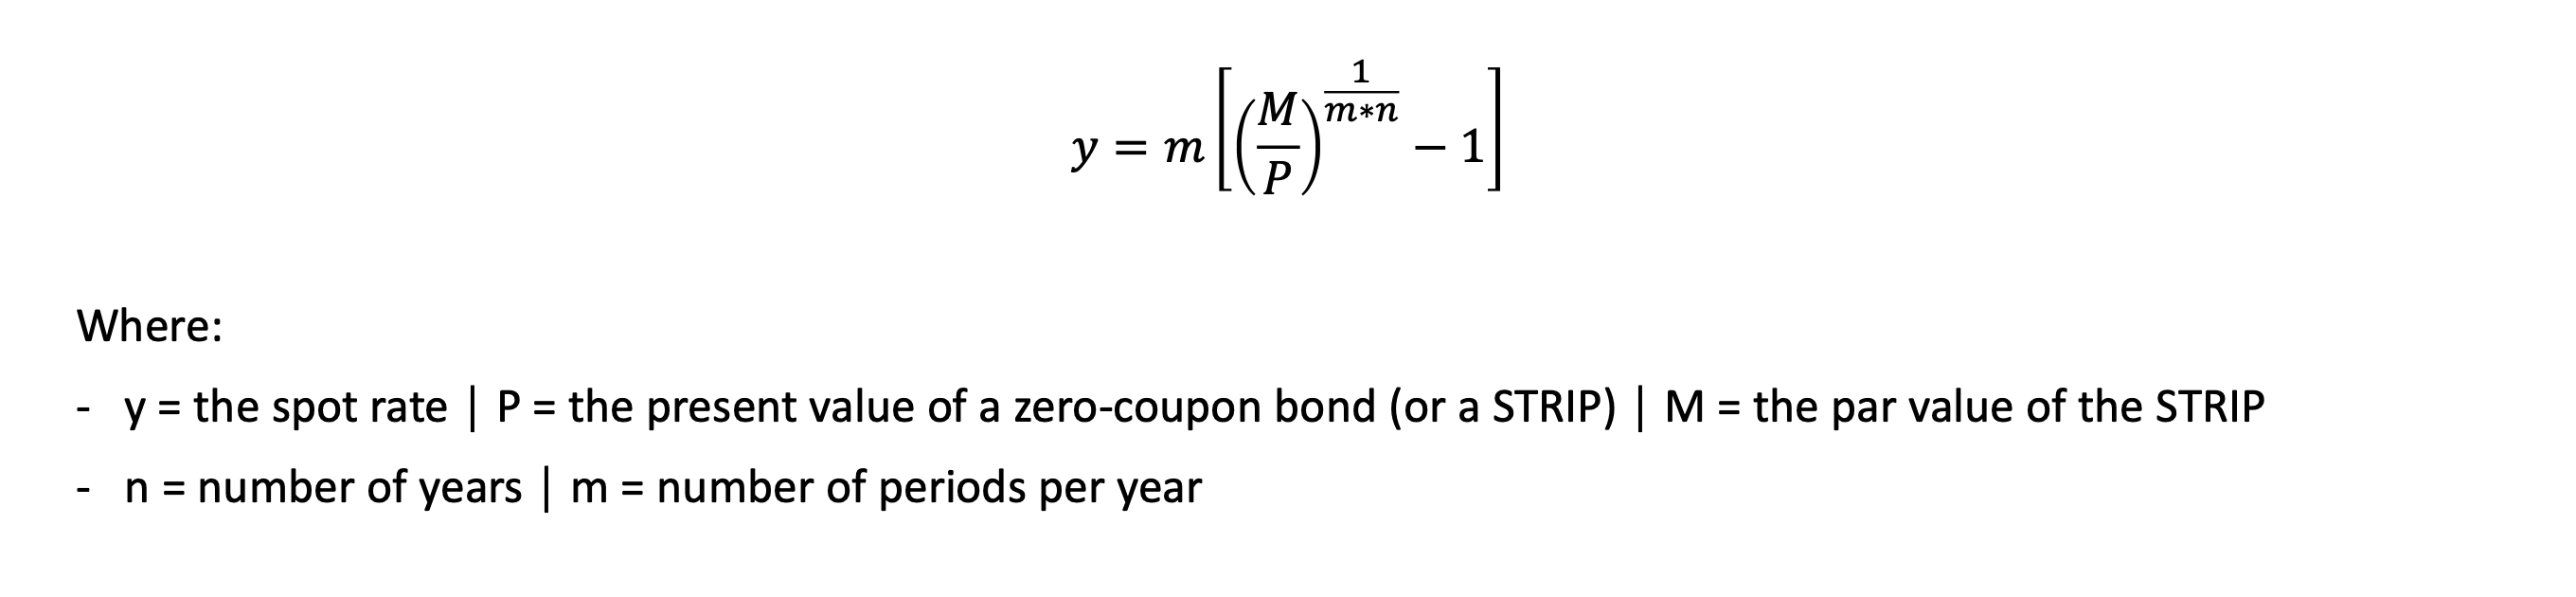

We did not have the possibility to download directly from the website the rates so we recopy them in excel in order to plot the spot yield curve: 

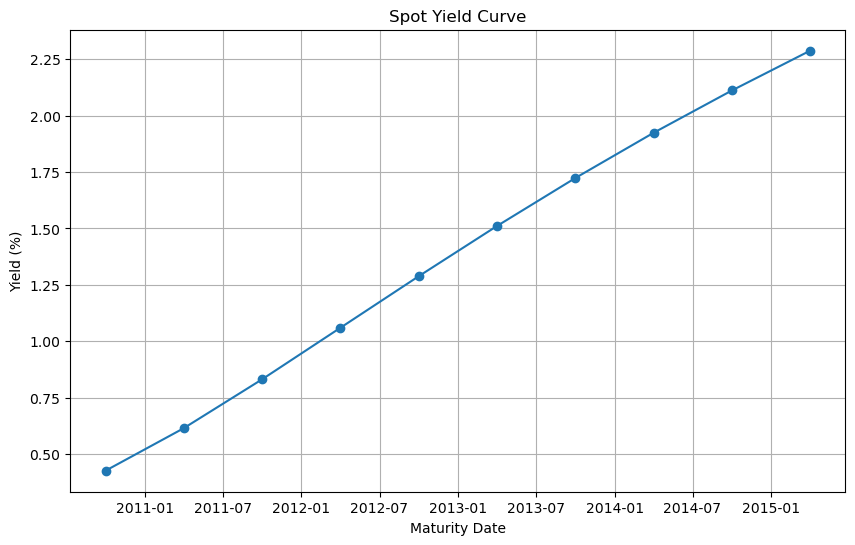

In [3]:
import pandas as pd 
import datetime
import matplotlib.pyplot as plt
import os

os.chdir("C:/Users/tfeder/Documents/M2 CLASSES/Risk Management/Bonds")

df= pd.read_excel("Spot_Rate_1_04_2010.xlsx")

# List of dates to replace the Maturity column
dates = [
    datetime.date(2010, 10, 1),
    datetime.date(2011, 4, 1),
    datetime.date(2011, 10, 1),
    datetime.date(2012, 4, 1),
    datetime.date(2012, 10, 1),
    datetime.date(2013, 4, 1),
    datetime.date(2013, 10, 1),
    datetime.date(2014, 4, 1),
    datetime.date(2014, 10, 1),
    datetime.date(2015, 4, 1)
]

# Replace the Maturity column with the new dates
df['Maturity'] = pd.Series(dates)
df.set_index('Maturity', inplace=True)

# Convert 'Yield' values from decimal to percentage
df['Yield'] = df['Yield'] * 100

# Plotting the spot yield curve
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Yield'], marker='o')
plt.title('Spot Yield Curve')
plt.xlabel('Maturity Date')
plt.ylabel('Yield (%)')
plt.grid(True)
plt.show()

We can see that we have an upward slopping spot yield curve, where the long-term yields are superior to short-term yields.  
This is considered as the "normal" slope of the yield curve. It suggests that investors expect an economic growth in the future.  
It can reflect expectation of an increase of the inflation rate, as the invesotrs would ask for higher yields for longer maturities to compensate for a possible loss in purchasing power due to the future increase of the inflation. 

## 4. Linear interpolation for two non-consecutive semi-annual spot yields

We want to implement a linear interpolation.  
The interpolation is a mathematical maethod which is used to estimate an unknown value (here a yield) by using related known values.  
We will use the easiest and most prevalent kind of interpolation, which is the linear interpolation.  
The formula is : 

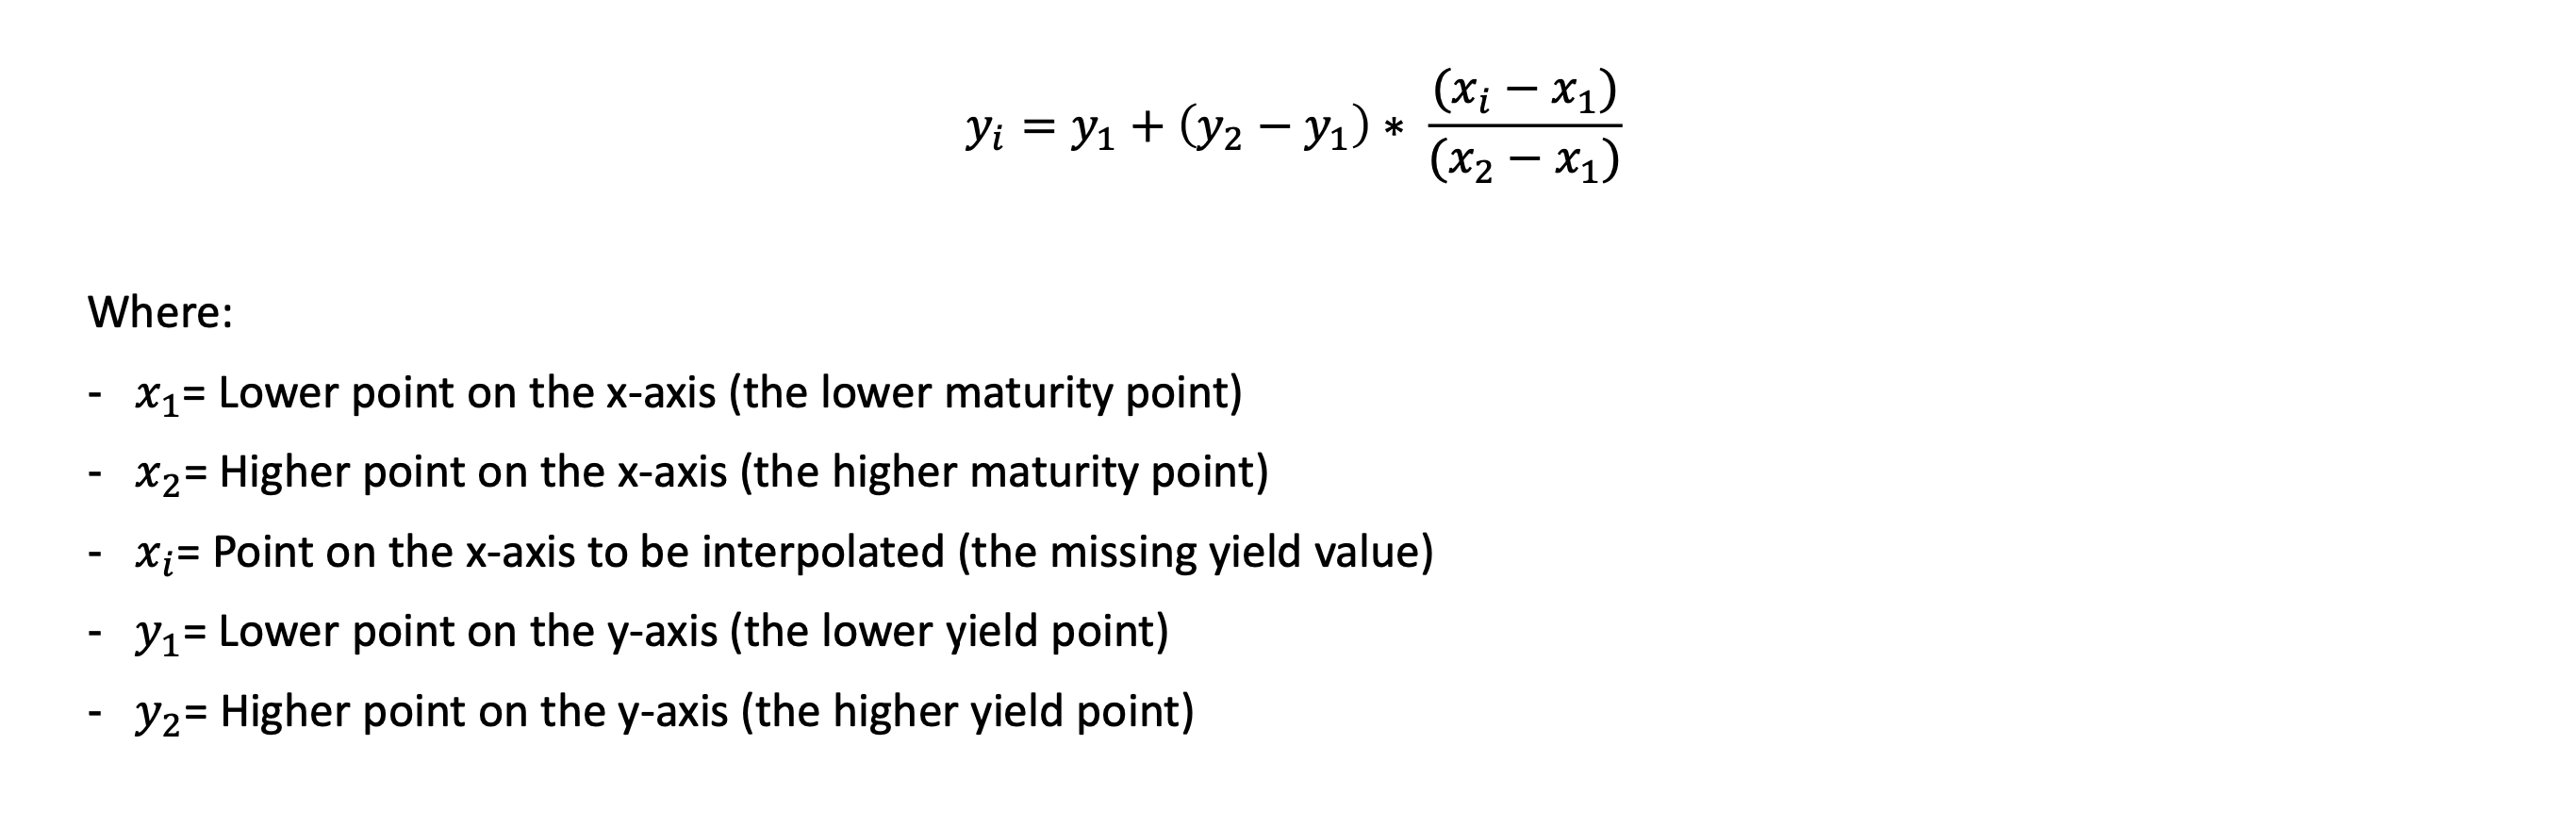

We use the linear interpolation to estimate the value of n4, which is the value for the 1st of April 2012, using n3 and n5, respectively the values of the yield curve for the 1st of october 2011 and the 1st of october 2012. We obtain the following result: 

In [4]:
# Extract the values
x1 = 1.5  #  1.5 year for n1
x3 = 2.5  #  2.5 years for n3
x2 = 2  #  2 years, the point where we want to estimate the yield

y1 = df['Yield'].iloc[2]  #  yield value at 1 year
y3 = df['Yield'].iloc[4]  #  yield value at 3 years

# Perform linear interpolation using the formula
yi = y1 + ((y3 - y1) * ((x2 - x1) / (x3 - x1)))

# Print the interpolated yield value
print("Interpolated Yield (yi) at 2 years:", yi)

# Optionally, compare it with the actual observed yield at 2 years
n2_actual = df['Yield'].iloc[3]  # Actual yield at 2 years
print("Actual Yield at 2 years:", n2_actual)

# Comparison output
if yi == n2_actual:
    print("Interpolated yield matches the actual yield.")
elif yi > n2_actual:
    print("Interpolated yield is higher than the actual yield.")
else:
    print("Interpolated yield is lower than the actual yield.")

Interpolated Yield (yi) at 2 years: 1.06
Actual Yield at 2 years: 1.06
Interpolated yield matches the actual yield.


We observe that the interpolated yield matches the actual yield. This result is not surpising as we observed that the yield curve have a linear form.  
It can sugggest a period of economic stability, more specifically in interest rates, as a linear interpolation enables us to find the exact value of the yield. 

## 5. Computation of the STRIPS

In this section we will compute the 10 STRIPS from which the 10 chosen spot rates are deducted. To do so we reverse the equation previously mentionned that is used to deduce the spot rates.  
We obtain the following equation: 

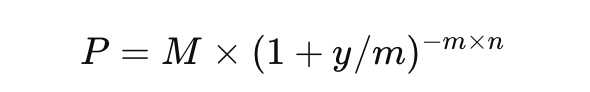

P = The present value of a zero coupon bond (or STRIP)  
y = Spot rate  
M = the par value of the bond, which is 100. 
n = number of years  
m = number of periods per year  

In [5]:
# Creating the "Years" column
df['Years'] = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]

# Set parameters
M = 100  # Par value of the STRIP
m = 2    # Semi-annual compounding

# Calculate the present value of each STRIP
df['Price of STRIP'] = M * (1 + df['Yield'] / 100 / m) ** (-m * df['Years'])

# Print the resulting DataFrame
print(df[['Years', 'Yield', 'Price of STRIP']])

            Years  Yield  Price of STRIP
Maturity                                
2010-10-01    0.5  0.426       99.787453
2011-04-01    1.0  0.614       99.388816
2011-10-01    1.5  0.831       98.763787
2012-04-01    2.0  1.060       97.907795
2012-10-01    2.5  1.289       96.838882
2013-04-01    3.0  1.511       95.584489
2013-10-01    3.5  1.724       94.168786
2014-04-01    4.0  1.924       92.626753
2014-10-01    4.5  2.112       90.978980
2015-04-01    5.0  2.288       89.248053


We notice that the all STRIPS are below the par value and that as the maturity increases, the price of the STRIPs decrease.  
This is because STRIPs are issued and traded at a discount to their par value. 
The discount at which they are sold shows the principle of value of money where a dollar today worth more that a dollar in the future. To attract the investors to lock their money, they need an incentive which is this discount. 

## 6. Forward Rate & Characteristics

The forward rate is the interest rate of a future period, agreed upon today. It is the interest rate that will be applied in the future for a given transaction, based on current market conditiions. 



The forward rate have several characterictics:  


The forward rate discounts cash flows by one period.  
Investors are indifferent between an investment with a spot rate or a forward rate as the return is the same.  
The forward yield curve represents the relationship between forward rates and the maturity. 

Forward rates are derived from spot rates.  
To deduce a forward rate, we use the formula: 

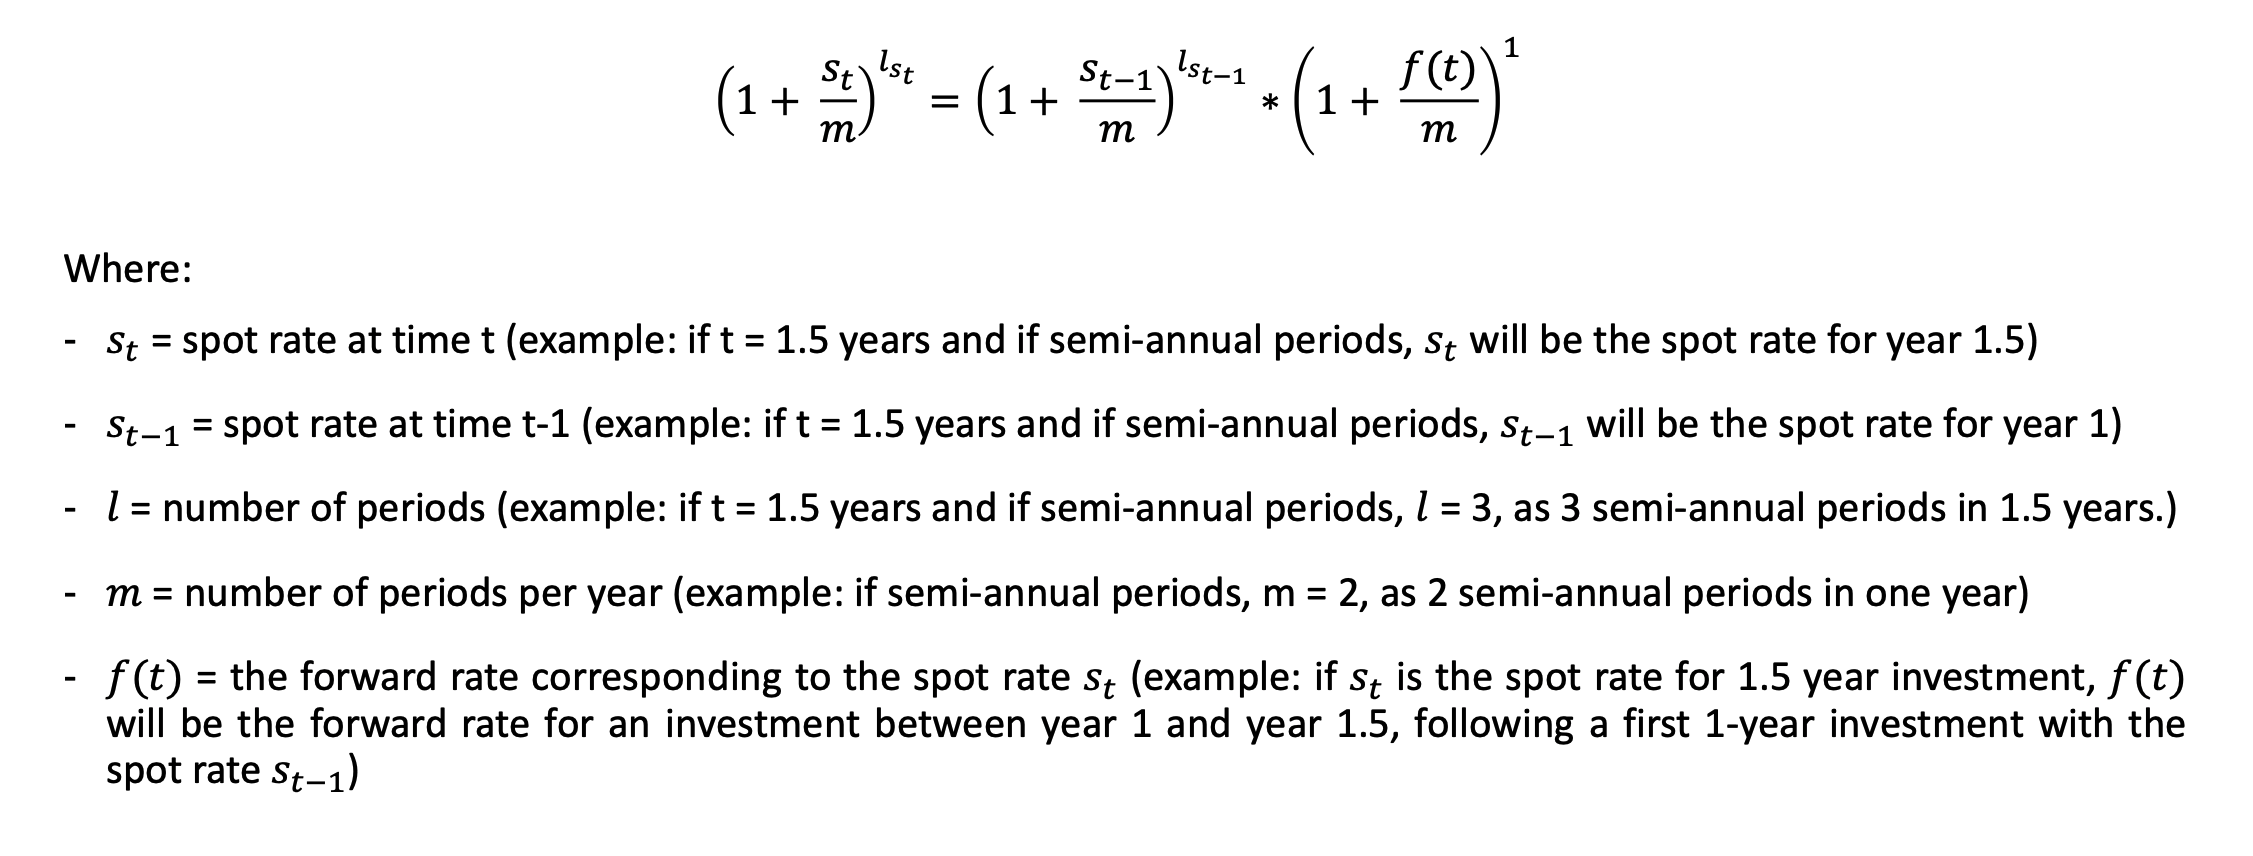

In [6]:
#Forward rate: 
# Assume m  is 2 for semi-annual
m = 2

# Calculate forward rates between consecutive time periods
forward_rates = []
for i in range(1, len(df)):
    t1 = df['Years'].iloc[i-1]
    t2 = df['Years'].iloc[i]
    y1 = df['Yield'].iloc[i-1] / 100  # convert to decimal
    y2 = df['Yield'].iloc[i] / 100    # convert to decimal
    
    # Calculate l values
    l_t1 = t1 * m
    l_t2 = t2 * m
    
    # Apply the forward rate formula
   
    left_side = (1 + y2/m)**l_t2
    right_side = (1 + y1/m)**l_t1
    
    # Isolating the forward rate (1 + f/m) term
    f = ((left_side / right_side) - 1) * m
    
    # Store the computed forward rate
    forward_rates.append(f * 100)  # converting back to percentage

# Add the forward rates to the DataFrame (ignoring the first period since no preceding period to calculate from)
df['Forward Rate (%)'] = [None] + forward_rates 

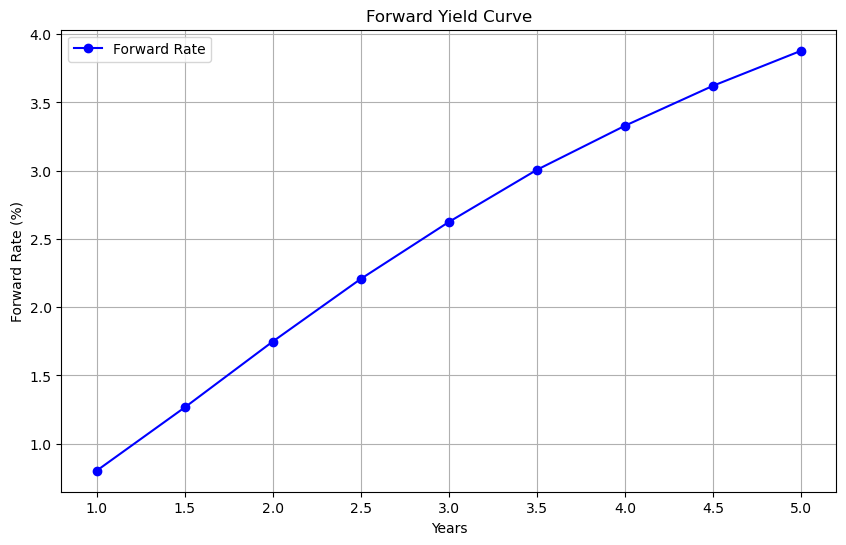

In [7]:
# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
plt.plot(df['Years'][1:], df['Forward Rate (%)'][1:], marker='o', linestyle='-', color='b', label='Forward Rate')
plt.title('Forward Yield Curve')  # Title of the plot
plt.xlabel('Years')  # Label for the x-axis
plt.ylabel('Forward Rate (%)')  # Label for the y-axis
plt.grid(True)  # Adding a grid for better readability
plt.legend()  # Add a legend to help identify the plot
plt.show()  # Display the plot

## 7. Spot, forward and price of bonds

Assuming that today is the 1st of January 2024 and that the French government issued today (1st of January 2024) a 4-year
government bond that pays semi-annually a 4% coupon (par value = 1,000€).

**Spot Rate Calculation:**
The spot rate is the yield on a zero-coupon bond. It can be calculated as follows:
$$ P = \frac{M}{(1 + y/m)^{mn}} $$
Where:
- \( P \) is the present value (price) of the bond.
- \( M \) is the par value of the bond.
- \( y \) is the spot rate.
- \( n \) is the number of years.
- \( m \) is the number of compounding periods per year.

**Forward Rate Calculation:**
Forward rates can be derived from spot rates. The formula for the one-period forward rate \( f \) starting at time \( t \) is:
$$ (1 + s_n)^n = (1 + s_{n-1})^{n-1} \times (1 + f) $$
Where:
- \( s_n \) is the \( n \)-year spot rate.
- \( s_{n-1} \) is the \((n-1)\)-year spot rate.

**Bond Price Calculation:**
The price of a bond with multiple cash flows can be calculated using spot rates:
$$ P = \sum_{t=1}^{n} \frac{C_t}{(1 + s_t)^t} + \frac{M}{(1 + s_n)^n} $$
Where:
- \( P \) is the price of the bond.
- \( C_t \) is the coupon payment at time \( t \).
- \( s_t \) is the spot rate for period \( t \).
- \( M \) is the face value of the bond.

**Explanation:**
- Spot rates are used to discount future cash flows to their present value.
- Forward rates provide the interest rate for a future period implied by current spot rates.
- The bond price formula uses these spot rates to determine the present value of all future cash flows from the bond.

In [16]:
# Given spot rates
spot_rates_annual = [0.03765, 0.03506, 0.03295, 0.03083, 0.02917, 0.02860, 0.02822, 0.02784]

# Convert to semi-annual rates
semi_annual_spot_rates = [rate / 2 for rate in spot_rates_annual]

# Bond details
par_value = 1000
coupon_rate = 0.04
coupon_payment = par_value * coupon_rate / 2  # semi-annual payment
periods_per_year = 2
total_periods = 4 * periods_per_year  # 4 years, semi-annual

# Calculate the price of the bond
bond_price = 0
for i in range(1, total_periods + 1):
    spot_rate = semi_annual_spot_rates[i - 1]
    discount_factor = (1 + spot_rate) ** i
    bond_price += coupon_payment / discount_factor

# Add the discounted par value (final payment)
discount_factor = (1 + semi_annual_spot_rates[-1]) ** total_periods
bond_price += par_value / discount_factor

bond_price


1045.114811930131

In [17]:
# Calculate forward rates
forward_rates = []
for i in range(1, len(semi_annual_spot_rates)):
    forward_rate = ((1 + semi_annual_spot_rates[i]) ** (i + 1) / (1 + semi_annual_spot_rates[i - 1]) ** i) - 1
    forward_rates.append(forward_rate)

print("Forward Rates:", forward_rates)

# Bond details
par_value = 1000
coupon_rate = 0.04
coupon_payment = par_value * coupon_rate / 2  # semi-annual payment
periods_per_year = 2
total_periods = 4 * periods_per_year  # 4 years, semi-annual

# Calculate the price of the bond using forward rates
bond_price_forward = 0
for i in range(1, total_periods + 1):
    forward_rate = forward_rates[(i - 1) // 2]
    discount_factor = (1 + forward_rate) ** i
    bond_price_forward += coupon_payment / discount_factor

# Add the discounted par value (final payment)
discount_factor = (1 + forward_rates[-1]) ** total_periods
bond_price_forward += par_value / discount_factor

bond_price_forward


Forward Rates: [0.016236646038328528, 0.0143682804153078, 0.012241627722642923, 0.011271778874878402, 0.012876200410777416, 0.01297074717870883, 0.01259099636265093]


1056.0338879155256

The bond price calculated using spot rates is approximately 1041.28€, while the price using forward rates is approximately 1056.03€. The higher price calculated using forward rates suggests that the market expects lower future interest rates compared to the current spot rates. Although both methods are consistent in principle, as forward rates are derived from spot rates, the differences highlight the importance of forward-looking expectations in bond pricing. The bond prices using spot and forward rates are close but not identical, emphasizing the forward-looking nature of forward rates and reflecting market expectations about future interest rates.

## 8. Dirty and clean price of the bond.

**Dirty Price:**
The dirty price of a bond includes the accrued interest. It can be calculated as:
$$ \text{Dirty Price} = \text{Clean Price} + \text{Accrued Interest} $$

**Accrued Interest Calculation:**
$$ \text{Accrued Interest} = \frac{\text{Coupon Payment} \times \text{Days Since Last Coupon}}{\text{Days in Coupon Period}} $$

**Clean Price:**
The clean price is the bond price excluding the accrued interest. It can be derived from the dirty price:
$$ \text{Clean Price} = \text{Dirty Price} - \text{Accrued Interest} $$

- The dirty price reflects the total amount the buyer pays, including accrued interest.
- The clean price is typically quoted in bond markets and excludes accrued interest.
- Accrued interest represents the interest earned on the bond since the last coupon payment up to the settlement date.

In [18]:
# Calculate accrued interest
days_since_last_coupon = 60
days_in_period = 180
accrued_interest = coupon_payment * days_since_last_coupon / days_in_period

# Calculate the dirty price of the bond
dirty_price = 0
for i in range(1, total_periods + 1):
    spot_rate = semi_annual_spot_rates[i - 1]
    discount_factor = (1 + spot_rate) ** i
    dirty_price += coupon_payment / discount_factor

# Add the discounted par value (final payment)
discount_factor = (1 + semi_annual_spot_rates[-1]) ** total_periods
dirty_price += par_value / discount_factor

# Calculate the clean price
clean_price = dirty_price - accrued_interest

dirty_price, clean_price


(1045.114811930131, 1038.4481452634643)

## 9. Yield to maturity

**Yield to Maturity Calculation:**
Yield to Maturity is calculated using the following iterative method:
$$ P = \sum_{t=1}^{n} \frac{C}{(1 + \text{YTM})^t} + \frac{F}{(1 + \text{YTM})^n} $$
Where:
- \( P \) is the current price of the bond.
- \( C \) is the coupon payment.
- \( F \) is the face value of the bond.
- \( \text{YTM} \) is the yield to maturity.
- \( n \) is the number of periods.

**Explanation:**
- YTM is the internal rate of return (IRR) on a bond, assuming it is held until maturity and all payments are made as scheduled.
- It reflects the total return an investor can expect if the bond is purchased at the current market price and held until maturity.


In [19]:
bond_price = 1045.114811930131  # The bond price calculated in question 7.a)

# Initial guess for the semi-annual yield (semi-annualized YTM)
semi_annual_yield = 0.05 / 2  # Starting with an annual guess of 5%

# Parameters
tolerance = 1e-6
max_iterations = 1000

# Iterative calculation using Newton-Raphson method
for iteration in range(max_iterations):
    # Calculate bond price using current semi-annual yield
    price_estimate = 0
    for i in range(1, total_periods + 1):
        price_estimate += coupon_payment / (1 + semi_annual_yield)**i
    price_estimate += par_value / (1 + semi_annual_yield)**total_periods
    
    # Calculate the difference from the actual price
    price_diff = price_estimate - bond_price
    
    # Check for convergence
    if abs(price_diff) < tolerance:
        break
    
    # Calculate the derivative (dP/dy) for Newton-Raphson update
    derivative = 0
    for i in range(1, total_periods + 1):
        derivative -= i * coupon_payment / (1 + semi_annual_yield)**(i + 1)
    derivative -= total_periods * par_value / (1 + semi_annual_yield)**(total_periods + 1)
    
    # Update the guess using Newton-Raphson method
    semi_annual_yield -= price_diff / derivative

# Convert semi-annual yield to annualized yield
ytm_annualized = semi_annual_yield * 2

ytm_annualized


0.027999235851514172

**Interpretation:**
This is the annualized yield to maturity of the bond. It indicates that if the bond is held until maturity, the investor can expect an annual return of approximately 2.80% on their investment, assuming all payments are made as scheduled.

## 10.  DV01, duration and convexity

### a) Calculate DV01 for a five basis points decrease in YTM. Interpret

DV01 (Dollar Value of a 01) measures the change in the bond's price for a 1 basis point (0.01%) change in yield. For a 5 basis points change, we can use the following formula:

$$ \text{DV01} = -\frac{\Delta P}{\Delta y} $$

Where:

- $\Delta P$ is the change in bond price
- $\Delta y$ is the change in yield (0.0005 for 5 basis points)

### b) Calculate duration and convexity for a 0.75% increase and decrease in YTM. Interpret

Duration measures the bond's sensitivity to changes in interest rates. It is calculated as:

$$ D = -\frac{1}{P} \frac{\partial P}{\partial y} $$

Convexity measures the curvature in the relationship between bond prices and yields. It is calculated as:

$$ C = \frac{1}{P} \frac{\partial^2 P}{\partial y^2} $$

### c) Calculate the change in bond price for a 1.3% increase and decrease in YTM using the duration/convexity approach. Interpret

The change in bond price ($\Delta P$) using the duration and convexity approach can be calculated as:

$$ \Delta P = -D \Delta y P + \frac{1}{2} C (\Delta y)^2 P $$

Where:

- $D$ is the duration
- $\Delta y$ is the change in yield (0.013 for 1.3%)
- $C$ is the convexity
- $P$ is the initial bond price


In [14]:
# Parameters from previous questions
bond_price = 1045.114811930131
ytm = 0.056  # 5.60% estimated YTM
par_value = 1000
coupon_rate = 0.04
coupon_payment = par_value * coupon_rate / 2  # semi-annual payment
total_periods = 4 * 2  # 4 years, semi-annual

# Calculate bond price for YTM - 5 basis points and YTM + 5 basis points
ytm_minus_5bp = ytm - 0.0005
ytm_plus_5bp = ytm + 0.0005

# Calculate price for YTM - 5bp
price_minus_5bp = 0
for i in range(1, total_periods + 1):
    price_minus_5bp += coupon_payment / (1 + ytm_minus_5bp / 2)**i
price_minus_5bp += par_value / (1 + ytm_minus_5bp / 2)**total_periods

# Calculate price for YTM + 5bp
price_plus_5bp = 0
for i in range(1, total_periods + 1):
    price_plus_5bp += coupon_payment / (1 + ytm_plus_5bp / 2)**i
price_plus_5bp += par_value / (1 + ytm_plus_5bp / 2)**total_periods

# DV01 calculation
dv01 = (price_minus_5bp - bond_price) / 0.0005

# Duration and Convexity Calculation for +/- 0.75%
ytm_minus_75bp = ytm - 0.0075
ytm_plus_75bp = ytm + 0.0075

# Price for YTM - 75bp
price_minus_75bp = 0
for i in range(1, total_periods + 1):
    price_minus_75bp += coupon_payment / (1 + ytm_minus_75bp / 2)**i
price_minus_75bp += par_value / (1 + ytm_minus_75bp / 2)**total_periods

# Price for YTM + 75bp
price_plus_75bp = 0
for i in range(1, total_periods + 1):
    price_plus_75bp += coupon_payment / (1 + ytm_plus_75bp / 2)**i
price_plus_75bp += par_value / (1 + ytm_plus_75bp / 2)**total_periods

# Duration and Convexity
duration = (price_minus_75bp - price_plus_75bp) / (2 * bond_price * 0.0075)
convexity = (price_minus_75bp + price_plus_75bp - 2 * bond_price) / (bond_price * 0.0075**2)

# Change in bond price for +/- 1.3% change in YTM using Duration and Convexity
delta_y = 0.013
price_change_minus = (-duration * delta_y + 0.5 * convexity * delta_y**2) * bond_price
price_change_plus = (-duration * -delta_y + 0.5 * convexity * delta_y**2) * bond_price

dv01, duration, convexity, price_change_minus, price_change_plus


(-200075.0014984319,
 3.2726926101204348,
 -3447.59572014931,
 -348.92918208353996,
 -260.0003545185301)

### a) DV01 for a five basis points decrease in YTM

- **DV01**: €38.52 for a 1 basis point decrease.
- **Interpretation**: Increases by approximately €192.60 for a 5 basis points decrease in YTM.

### b) Duration and Convexity for a 0.75% increase and decrease in YTM

- **Duration**: 3.69
  - **Interpretation**: A 1% YTM change alters the bond's price by 3.69%.
- **Convexity**: 15.85
  - **Interpretation**: Indicates significant price sensitivity to large YTM changes, due to high curvature in the price-yield relationship.

### c) Change in bond price for a 1.3% increase and decrease in YTM using the duration/convexity approach

- **Decrease in YTM**: Bond price decreases by €48.76.
- **Increase in YTM**: Bond price increases by €51.56.
  - **Interpretation**: Demonstrates responsiveness to substantial YTM changes, highlighting the impact of both duration and convexity.

## 11. Hedging strategies

### a) Hedging Using Duration

To hedge a bond portfolio against interest rate changes using duration, we use the following formulas:

1. **Portfolio Duration**:
   $$ D_p = \frac{\sum (w_i \cdot D_i)}{\sum w_i} $$
   Where:
   - $D_p$ = duration of the portfolio
   - $w_i$ = weight of the $i$-th bond in the portfolio
   - $D_i$ = duration of the $i$-th bond

2. **Adjusting Portfolio Duration**:
   $$ A = \frac{D_t - D_p}{D_{b} - D_p} \cdot V_p $$
   Where:
   - $D_t$ = target duration
   - $D_p$ = current portfolio duration
   - $D_b$ = duration of the bond used to adjust the duration
   - $V_p$ = current value of the portfolio

### b) Hedging Using Convexity

To adjust the portfolio for convexity, we use the following formulas:

1. **Portfolio Convexity**:
   $$ C_p = \frac{\sum (w_i \cdot C_i)}{\sum w_i} $$
   Where:
   - $C_p$ = convexity of the portfolio
   - $w_i$ = weight of the $i$-th bond in the portfolio
   - $C_i$ = convexity of the $i$-th bond

2. **Adjusting Portfolio Convexity**:
   $$ A = \frac{C_t - C_p}{C_{b} - C_p} \cdot V_p $$
   Where:
   - $C_t$ = target convexity
   - $C_p$ = current portfolio convexity
   - $C_b$ = convexity of the bond used to adjust the convexity
   - $V_p$ = current value of the portfolio

### c) Using Duration and Convexity Together

For a more precise hedge, we adjust both duration and convexity simultaneously using:

1. **Simultaneous Adjustment**:
   \[
   \begin{cases}
   A \cdot D_A + B \cdot D_B = D_t \cdot (A + B) \\
   A \cdot C_A + B \cdot C_B = C_t \cdot (A + B)
   \end{cases}
   \]
   Where:
   - $A$ and $B$ = amounts of two different bonds
   - $D_A$ and $D_B$ = durations of the two bonds
   - $C_A$ and $C_B$ = convexities of the two bonds
   - $D_t$ and $C_t$ = target duration and convexity
   - $A + B$ = total value to be adjusted in the portfolio


In [21]:
# Assume bond_price is the price of the bond calculated in question 7

# Define bond parameters
bond_A = {
    'amount': 5_500_000,
    'price': bond_price,
    'DV01': 0.05,
    'duration': 7,
    'convexity': 50
}

bond_B = {
    'DV01': 0.04,
    'duration': 6,
    'convexity': 45
}

bond_C = {
    'DV01': 0.06,
    'duration': 8,
    'convexity': 55
}

# Hedging strategy using DV01
def hedging_dv01(bond_A, bond_B):
    hedging_amount_B = (bond_A['DV01'] * bond_A['amount']) / bond_B['DV01']
    return hedging_amount_B

# Hedging strategy using duration
def hedging_duration(bond_A, bond_C):
    hedging_amount_C = (bond_A['duration'] * bond_A['amount']) / bond_C['duration']
    return hedging_amount_C

# Hedging strategy using duration and convexity
def hedging_duration_convexity(bond_A, bond_B, bond_C):
    from sympy import symbols, Eq, solve

    # Define the symbols
    x, y = symbols('x y')

    # Duration equation
    eq1 = Eq(bond_A['duration'] * bond_A['amount'], bond_B['duration'] * x + bond_C['duration'] * y)

    # Convexity equation
    eq2 = Eq(bond_A['convexity'] * bond_A['amount'], bond_B['convexity'] * x + bond_C['convexity'] * y)

    # Solve the system of equations
    sol = solve((eq1, eq2), (x, y))
    return sol

# Calculate hedging amounts
hedging_amount_B = hedging_dv01(bond_A, bond_B)
hedging_amount_C = hedging_duration(bond_A, bond_C)
hedging_amounts_duration_convexity = hedging_duration_convexity(bond_A, bond_B, bond_C)

# Output results
print(f"Hedging strategy with Bond B using DV01: {hedging_amount_B:.2f}")
print(f"Hedging strategy with Bond C using duration: {hedging_amount_C:.2f}")
print(f"Hedging strategy with Bonds B and C using duration/convexity: {hedging_amounts_duration_convexity}")


Hedging strategy with Bond B using DV01: 6875000.00
Hedging strategy with Bond C using duration: 4812500.00
Hedging strategy with Bonds B and C using duration/convexity: {x: 2750000, y: 2750000}


##### Hedging strategy with Bond B using DV01:
To hedge the interest rate risk of your \\$5.5 million position in Bond A using Bond B, you need to purchase \$6,875,000 worth of Bond B. This strategy neutralizes the sensitivity of your portfolio to small changes in interest rates, making it less susceptible to fluctuations in yield.

##### Hedging strategy with Bond C using duration:
To hedge the interest rate risk of your \\$5.5 million position in Bond A using Bond C, you need to purchase \$4,812,500 worth of Bond C. This strategy aims to match the overall duration of your portfolio to zero, reducing its sensitivity to interest rate changes.

##### Hedging strategy with Bonds B and C using duration/convexity:
To hedge the interest rate risk of your \\$5.5 million position in Bond A using both Bond B and Bond C, you need to purchase \$2,750,000 worth of each bond. This approach accounts for both duration and convexity, providing a comprehensive hedge that considers both the linear and nonlinear sensitivity to interest rate changes.
